### Product and Retail Data Analysis
https://www.kaggle.com/carrie1/ecommerce-data/downloads/ecommerce-data.zip/1

https://www.kaggle.com/admond1994/e-commerce-data-eda/notebook

#### About out Data
- Company - UK-based and registered non-store online retail
- Products for selling - Mainly all-occasion gifts
- Customers - Most are wholesalers (local or international)
- Transactions Period - 1st Dec 2010 - 9th Dec 2011 (One year)

In [42]:
# Import our modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
# current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

#import missingno as msno # missing data visualization module for Python
#import ydata_profiling

import gc
import datetime

%matplotlib inline
# Using ggplot's style
plt.style.use('ggplot')

In [43]:
# Loading our data
# specify encoding to deal with different formats
#df = pd.read_csv('./data/ecommerce/data.csv', encoding = 'ISO-8859-1')

# Download and unzip our zipfile
from urllib.request import urlopen
from zipfile import ZipFile

zipurl = 'https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/ecommerce_data.zip'
zipresp = urlopen(zipurl) # Create a new file on the hard drive
tempzip = open("tmp/tempfile.zip", "wb") # Write the contents of the downloaded file into the new file
tempzip.write(zipresp.read()) # Close the newly-created file
tempzip.close() # Re-open the newly-created file with ZipFile()
zf = ZipFile("tmp/tempfile.zip") # Extract its contents into <extraction_path>
zf.extractall(path = '') # note that extractall will automatically create the path, left blank so it's in working directory
# close the ZipFile instance
zf.close()

df = pd.read_csv("ecommerce_data.csv", encoding = 'ISO-8859-1')
print("Dados carregados com sucesso!")
print(df.head())

Dados carregados com sucesso!
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [44]:
# alternativa para manter o dados na memoria, apenas teste, não sei se vai ser relevante pra mim
from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO
import pandas as pd

zipurl = 'https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/ecommerce_data.zip'

with urlopen(zipurl) as resp:
    zip_content = BytesIO(resp.read())

with ZipFile(zip_content) as zf:
    with zf.open('ecommerce_data.csv') as csv_file:
        df = pd.read_csv(csv_file, encoding='ISO-8859-1')

print("Dados carregados com sucesso!")
print(df.head())

Dados carregados com sucesso!
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [45]:
df.head(25)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [47]:
# check missing values for each column 
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
StockCode           0
InvoiceNo           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [48]:
# check out the rows with missing values
df[df.isnull().any(axis=1)].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/2010 14:32,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,12/1/2010 14:32,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,12/1/2010 14:32,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,12/1/2010 14:32,0.43,NaN,United Kingdom


In [49]:
# change the invoice_date format - String to Timestamp format
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [51]:
# df_new without missing values
df_no_missing = df.dropna()

In [52]:
# check missing values for each column 
df_no_missing.isnull().sum().sort_values(ascending=False)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [53]:
# change columns tyoe - String to Int type 
df_no_missing['CustomerID'] = df_no_missing['CustomerID'].astype('int64')

In [54]:
df_no_missing.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [55]:
# Rename the dataframe to make code more readable
df2 = df_no_missing.copy()

In [56]:
df2.describe().round(2)

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.00,406829,406829.00,406829.00
mean,12.06,2011-07-10 16:30:57.879207424,3.46,15287.69
min,-80995.00,2010-12-01 08:26:00,0.00,12346.00
25%,2.00,2011-04-06 15:02:00,1.25,13953.00
50%,5.00,2011-07-31 11:48:00,1.95,15152.00
75%,12.00,2011-10-20 13:06:00,3.75,16791.00
max,80995.00,2011-12-09 12:50:00,38970.00,18287.00
std,248.69,NaN,69.32,1713.60


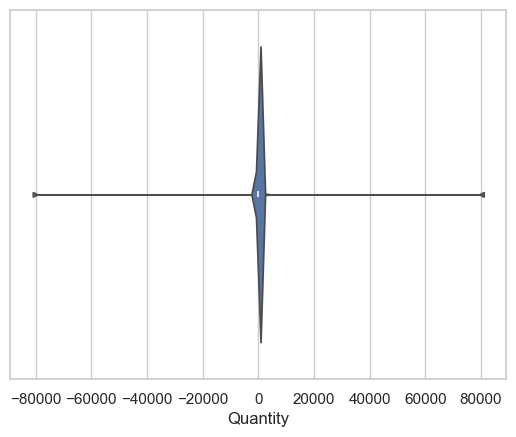

In [57]:
sns.set(style="whitegrid")
ax = sns.violinplot(x=df2["Quantity"])

In [58]:
# remove negative quanitites

df2 = df2[df2.Quantity > 0]
df2.describe().round(2)

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397924.00,397924,397924.00,397924.00
mean,13.02,2011-07-10 23:43:36.912475648,3.12,15294.32
min,1.00,2010-12-01 08:26:00,0.00,12346.00
25%,2.00,2011-04-07 11:12:00,1.25,13969.00
50%,6.00,2011-07-31 14:39:00,1.95,15159.00
75%,12.00,2011-10-20 14:33:00,3.75,16795.00
max,80995.00,2011-12-09 12:50:00,8142.75,18287.00
std,180.42,NaN,22.10,1713.17


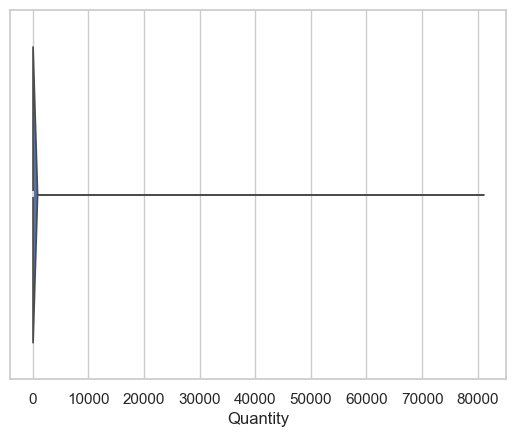

In [59]:
ax = sns.violinplot(x=df2["Quantity"])

In [60]:
df2['AmountSpent'] = df2['Quantity'] * df2['UnitPrice']
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [61]:
# Let's add Month, Day and Hour Colummns that we'll use for further analysis
# Starting with Month_Year First
df2['month_year'] = df2['InvoiceDate'].dt.to_period('M')
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,month_year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12


In [65]:
df2 = df2.assign(
    year       = df2['InvoiceDate'].dt.year,
    month      = df2['InvoiceDate'].dt.month,
    day        = df2['InvoiceDate'].dt.day,
    dayofweek  = df2['InvoiceDate'].dt.dayofweek,
    dayofyear  = df2['InvoiceDate'].dt.dayofyear,
    weekofyear = df2['InvoiceDate'].dt.isocalendar().week,
    quarter    = df2['InvoiceDate'].dt.quarter
)

df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,month_year,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,2,335,48,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,48,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,2,335,48,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,48,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,48,4


In [66]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  int64         
 7   Country      397924 non-null  object        
 8   AmountSpent  397924 non-null  float64       
 9   month_year   397924 non-null  period[M]     
 10  year         397924 non-null  int32         
 11  month        397924 non-null  int32         
 12  day          397924 non-null  int32         
 13  dayofweek    397924 non-null  int32         
 14  dayofyear    397924 non-null  int32         
 15  weekofyear   397924 non-null  UInt32   

In [67]:
# +1 to make Monday=1.....until Sunday=7
df2['dayofweek'] = df2['dayofweek'] + 1
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,month_year,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,3,335,48,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,3,335,48,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4


## Exploring and Analysing the Data

In [102]:
# Consolidating the number of Sales Made per customer for each country
# We use InvoiceNo as the count for sales
sales_per_cust = (
    df2.groupby(['CustomerID', 'Country'], as_index=False)
       .agg(NumberOfSales=('InvoiceNo', 'nunique'))
       .sort_values('NumberOfSales', ascending=False)
       .reset_index(drop=True)
)

sales_per_cust.head(10)

,CustomerID,Country,NumberOfSales
0,12748,United Kingdom,210
1,14911,EIRE,201
2,17841,United Kingdom,124
3,13089,United Kingdom,97
4,14606,United Kingdom,93
5,15311,United Kingdom,91
6,12971,United Kingdom,86
7,14646,Netherlands,74
8,16029,United Kingdom,63
9,13408,United Kingdom,62


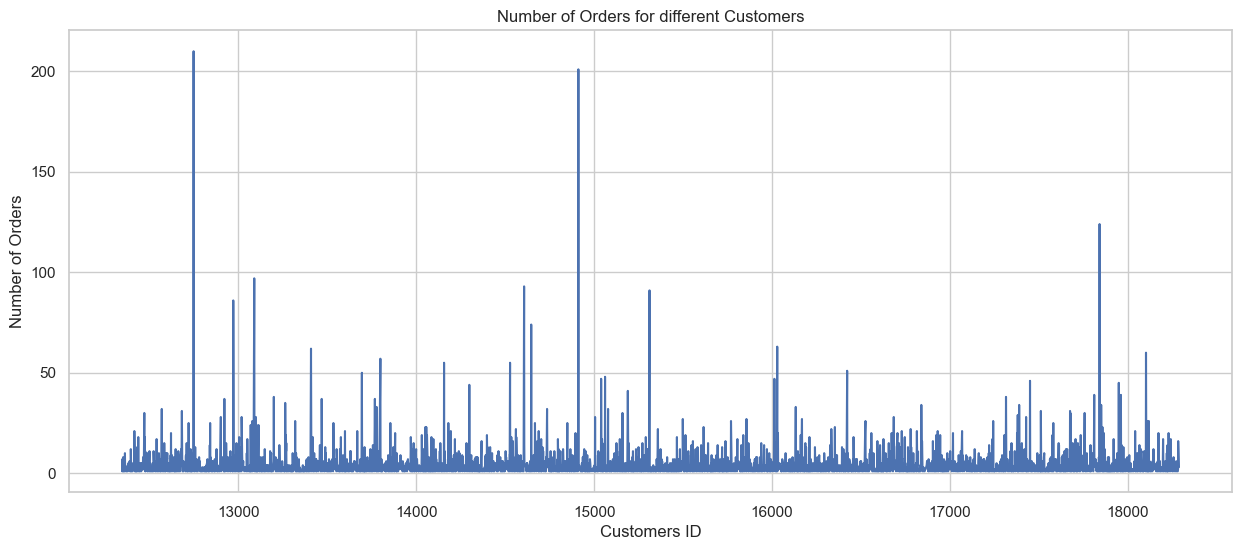

In [146]:
# Visualizing No. of Sales for all Customers

orders = (
    df2.groupby(['CustomerID', 'Country'], as_index=False)['InvoiceNo']
        .nunique()
)

plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

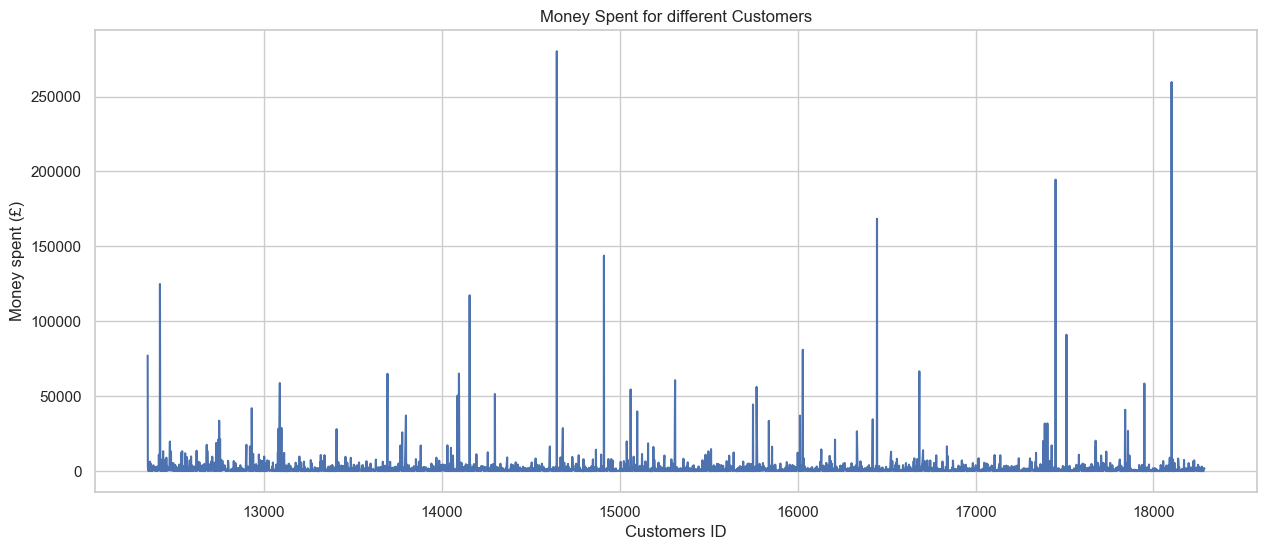

In [152]:
# Visualizing Money Spent for all Customer
money_spent = (df2.groupby(['CustomerID', 'Country'], as_index=False)
        .agg(TotalSpent=('AmountSpent', 'sum'))  # nome da coluna mais descritivo
        .round(2))  # arredonda para 2 casas decimais

plt.subplots(figsize=(15,6))
plt.plot(money_spent.CustomerID, money_spent.TotalSpent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (£)')
plt.title('Money Spent for different Customers')
plt.show()

In [155]:
# Consolidating the number of Sales Made per customer (Revenue)
# we use use index=False, to indicate to the groupby that we don't want to set the column ID as index
spent_per_cust = (df2.groupby(['CustomerID', 'Country'], as_index=False)
       .agg(TotalSpent=('AmountSpent', 'sum'))
       .nlargest(10, 'TotalSpent')  # mais claro que .sort_values() + .head()
       .reset_index(drop=True)      # opcional: índice limpo começando em 0
)

spent_per_cust

,CustomerID,Country,TotalSpent
0,14646,Netherlands,280206.02
1,18102,United Kingdom,259657.30
2,17450,United Kingdom,194550.79
3,16446,United Kingdom,168472.50
4,14911,EIRE,143825.06
5,12415,Australia,124914.53
6,14156,EIRE,117379.63
7,17511,United Kingdom,91062.38
8,16029,United Kingdom,81024.84
9,12346,United Kingdom,77183.60


# Purchasing Patterns
https://www.kaggle.com/hendraherviawan/customer-purchasing-patterns

In [156]:
# Check our data
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,month_year,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,3,335,48,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,3,335,48,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4


In [157]:
# Insert a new column as our 3rd row (index 2) with year_month by joining our year with month from our InvoiceDate field
df2.insert(loc=2, column='year_month', value=df2['InvoiceDate'].map(lambda x: 100*x.year + x.month))

# Insert a new column as our 6th column (index 5) with our Hour extracted from InvoiceDate
df2.insert(loc=5, column='hour', value=df2.InvoiceDate.dt.hour)

In [158]:
# Check to see if our year_month and hour columns were made
df2.head()

,InvoiceNo,StockCode,year_month,Description,Quantity,hour,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,month_year,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,201012,WHITE HANGING HEART T-LIGHT HOLDER,6,8,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,3,335,48,4
1,536365,71053,201012,WHITE METAL LANTERN,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
2,536365,84406B,201012,CREAM CUPID HEARTS COAT HANGER,8,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,3,335,48,4
3,536365,84029G,201012,KNITTED UNION FLAG HOT WATER BOTTLE,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
4,536365,84029E,201012,RED WOOLLY HOTTIE WHITE HEART.,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4


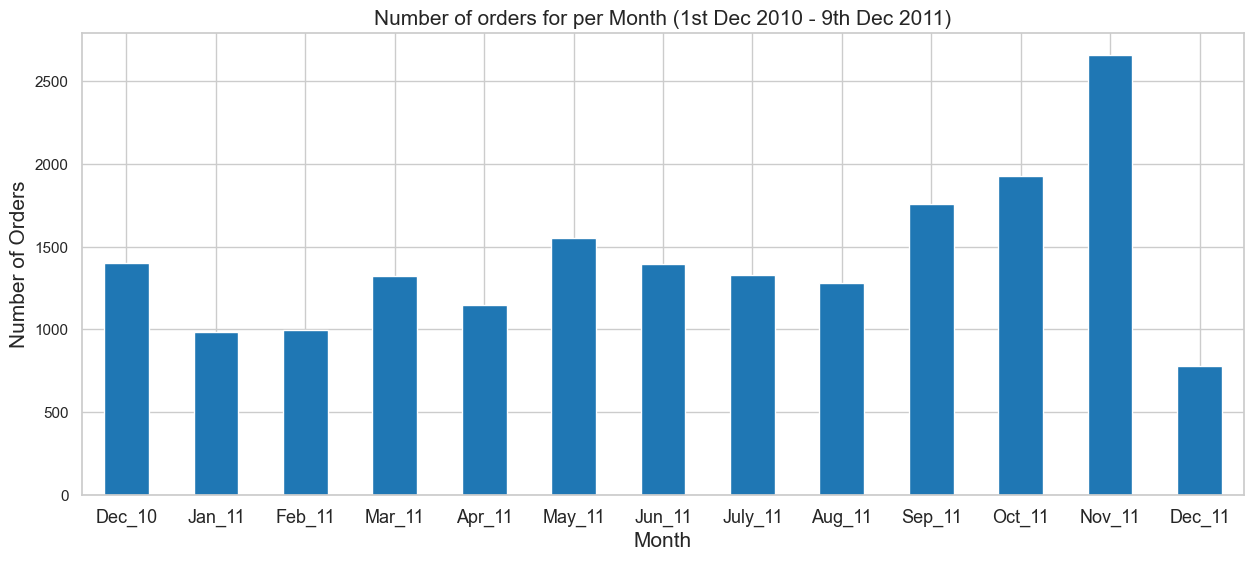

In [161]:
# Create a plot that shows the number of orders per month 
ax = df2.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot(kind='bar',color='#1f77b4',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for per Month (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

In [162]:
# Let's see number of orders per day of the week
df2.groupby('InvoiceNo')['dayofweek'].unique().value_counts().sort_index()

dayofweek
[1]    2863
[2]    3185
[3]    3455
[4]    4033
[5]    2831
[7]    2169
Name: count, dtype: int64

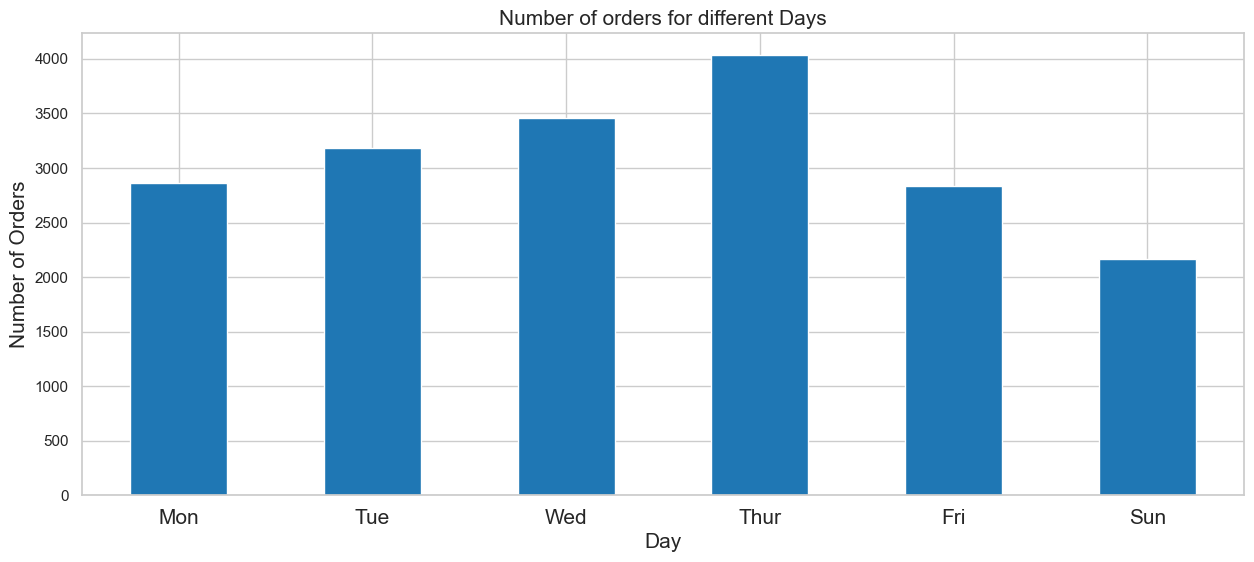

In [178]:
# Create a plot for the above
ax = df2.groupby('InvoiceNo')['dayofweek'].unique().value_counts().sort_index().plot(kind='bar',color='#1f77b4',figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

In [172]:
df2.columns

Index(['InvoiceNo', 'StockCode', 'year_month', 'Description', 'Quantity',
       'hour', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country',
       'AmountSpent', 'month_year', 'year', 'month', 'day', 'dayofweek',
       'dayofyear', 'weekofyear', 'quarter'],
      dtype='object')

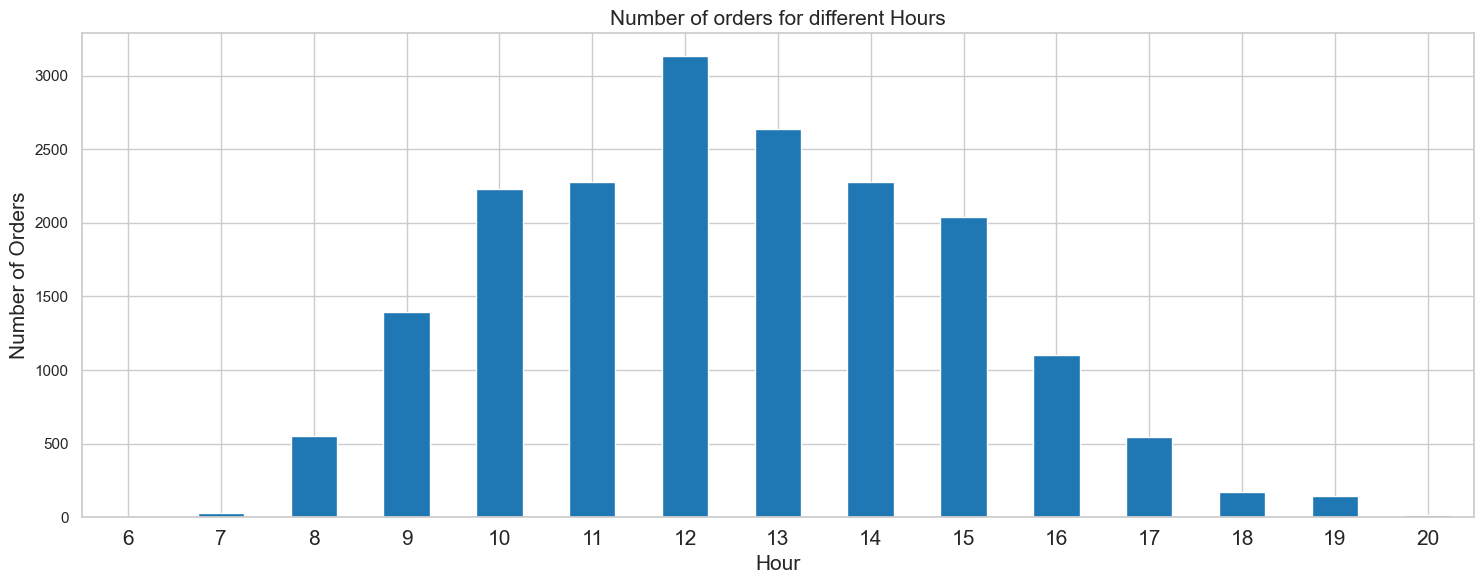

In [176]:
# Cálculo correto: número de pedidos únicos por hora
orders_per_hour = df2.groupby(df2['InvoiceDate'].dt.hour)['InvoiceNo'].nunique()

# Reindexa para garantir horas de 6 a 20 (ou o intervalo desejado)
ax = orders_per_hour.reindex(range(6, 21), fill_value=0)\
                    .plot(kind='bar', color='#1f77b4', figsize=(15,6))

ax.set_xlabel('Hour', fontsize=15)
ax.set_ylabel('Number of Orders', fontsize=15)
ax.set_title('Number of orders for different Hours', fontsize=15)

ax.set_xticklabels(range(6, 21), rotation='horizontal', fontsize=15)

plt.tight_layout()
plt.show()

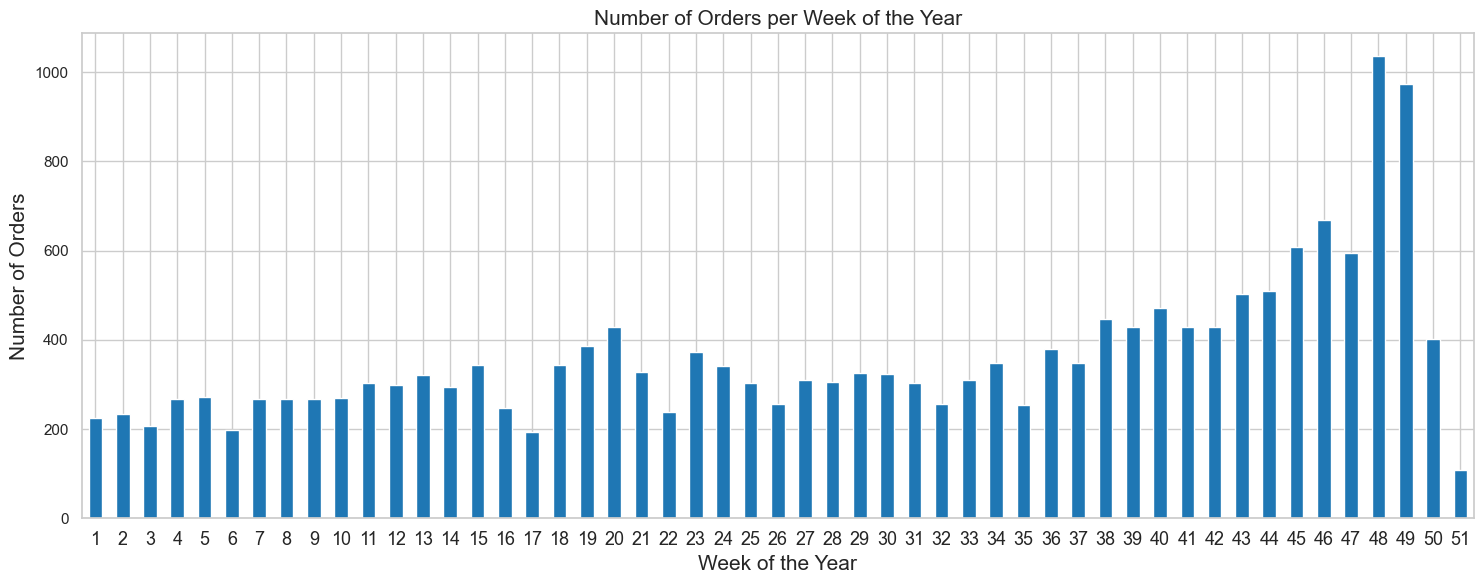

In [180]:
# Número de pedidos únicos por semana do ano
orders_per_week = df2.groupby(df2['InvoiceDate'].dt.isocalendar().week)['InvoiceNo'].nunique()

# Plota o gráfico
ax = orders_per_week.plot(kind='bar', color='#1f77b4', figsize=(15,6))

ax.set_xlabel('Week of the Year', fontsize=15)
ax.set_ylabel('Number of Orders', fontsize=15)
ax.set_title('Number of Orders per Week of the Year', fontsize=15)

# Rótulos dos eixos x (semanas de 1 a 52)
ax.set_xticklabels(range(1, len(orders_per_week) + 1), rotation='horizontal', fontsize=13)

plt.tight_layout()
plt.show()

### Analyze Unit Prices of our items

In [181]:
df2.UnitPrice.describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

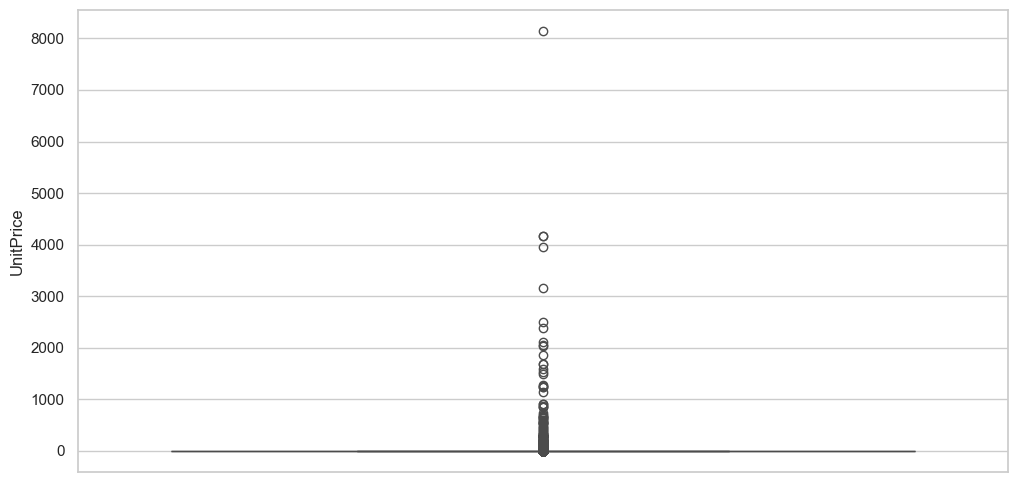

In [182]:
# check the distribution of unit price
plt.subplots(figsize=(12,6))
sns.boxplot(df2.UnitPrice)
plt.show()

In [183]:
# What are the free items
df_free = df2[df2.UnitPrice == 0]
print(len(df_free))
df_free.head()

40


,InvoiceNo,StockCode,year_month,Description,Quantity,hour,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,month_year,year,month,day,dayofweek,dayofyear,weekofyear,quarter
9302,537197,22841,201012,ROUND CAKE TIN VINTAGE GREEN,1,14,2010-12-05 14:02:00,0.0,12647,Germany,0.0,2010-12,2010,12,5,7,339,48,4
33576,539263,22580,201012,ADVENT CALENDAR GINGHAM SACK,4,14,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0,2010-12,2010,12,16,4,350,50,4
40089,539722,22423,201012,REGENCY CAKESTAND 3 TIER,10,13,2010-12-21 13:45:00,0.0,14911,EIRE,0.0,2010-12,2010,12,21,2,355,51,4
47068,540372,22090,201101,PAPER BUNTING RETROSPOT,24,16,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0,2011-01,2011,1,6,4,6,1,1
47070,540372,22553,201101,PLASTERS IN TIN SKULLS,24,16,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0,2011-01,2011,1,6,4,6,1,1


In [184]:
# See when these free items were given out
df_free.year_month.value_counts().sort_index()

year_month
201012     3
201101     3
201102     1
201103     2
201104     2
201105     2
201107     2
201108     6
201109     2
201110     3
201111    14
Name: count, dtype: int64

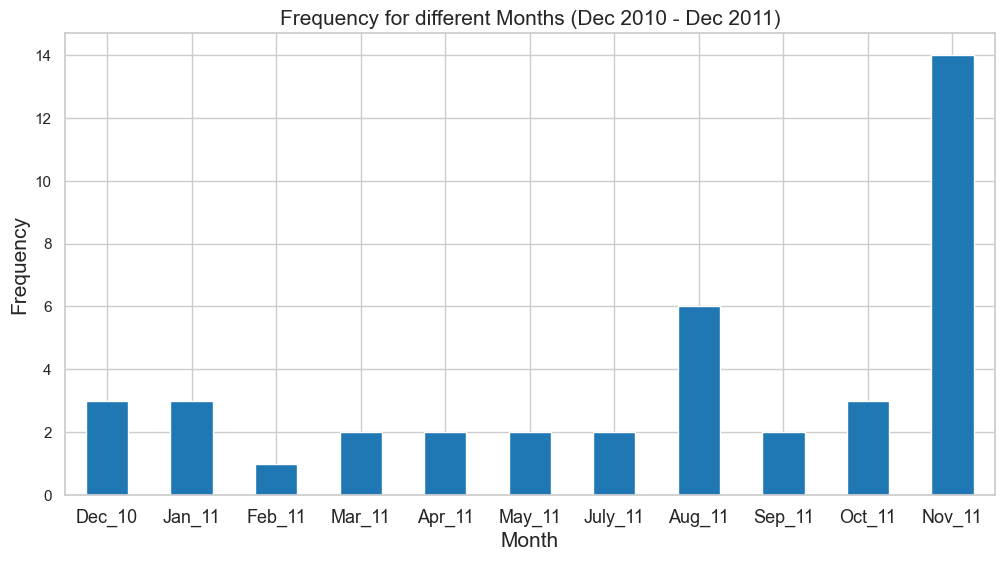

In [186]:
# Ploting the above data
ax = df_free.year_month.value_counts().sort_index().plot(kind='bar',figsize=(12,6), color='#1f77b4')
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_title('Frequency for different Months (Dec 2010 - Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11'), rotation='horizontal', fontsize=13)
plt.show()

On average, the company gave out 2-4 times FREE items to customers each month (Except in June 2011)

### Analysis per Country

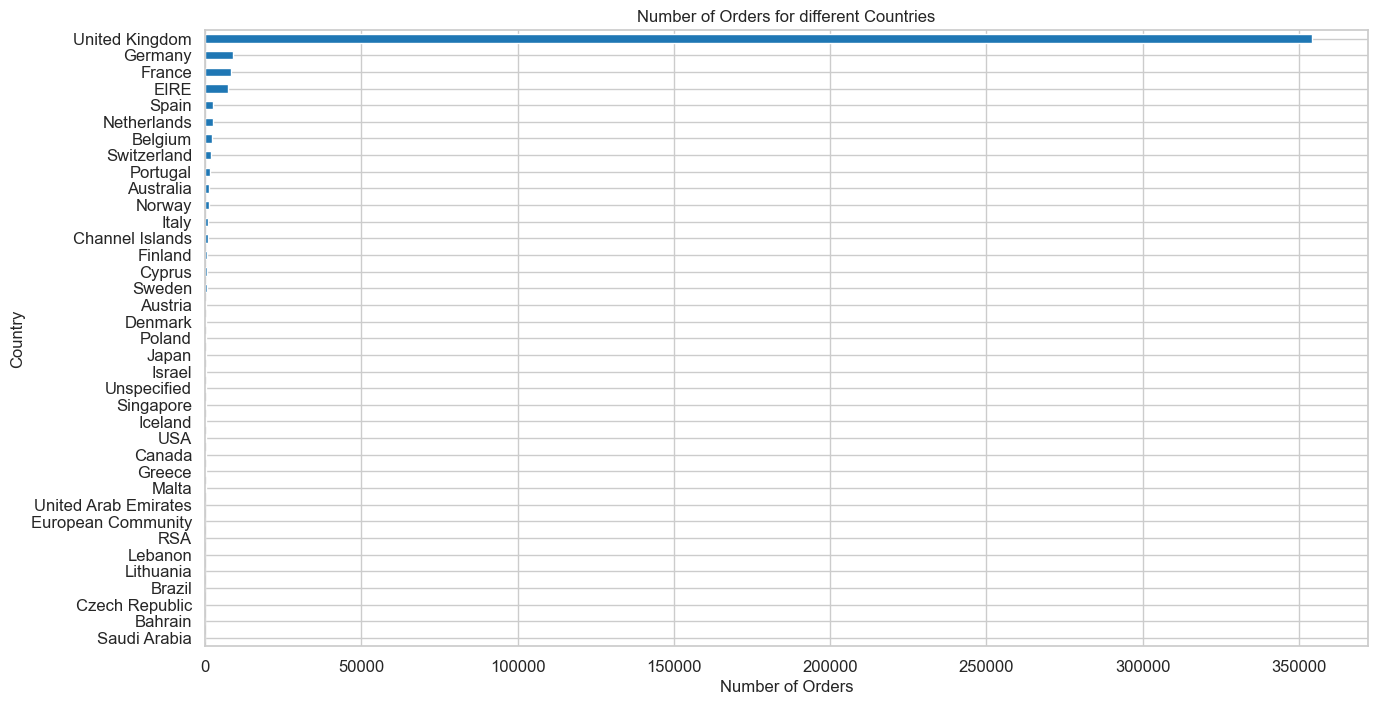

In [190]:
group_country_orders = df2.groupby('Country')['InvoiceDate'].count().sort_values()

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12, color='#1f77b4')
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

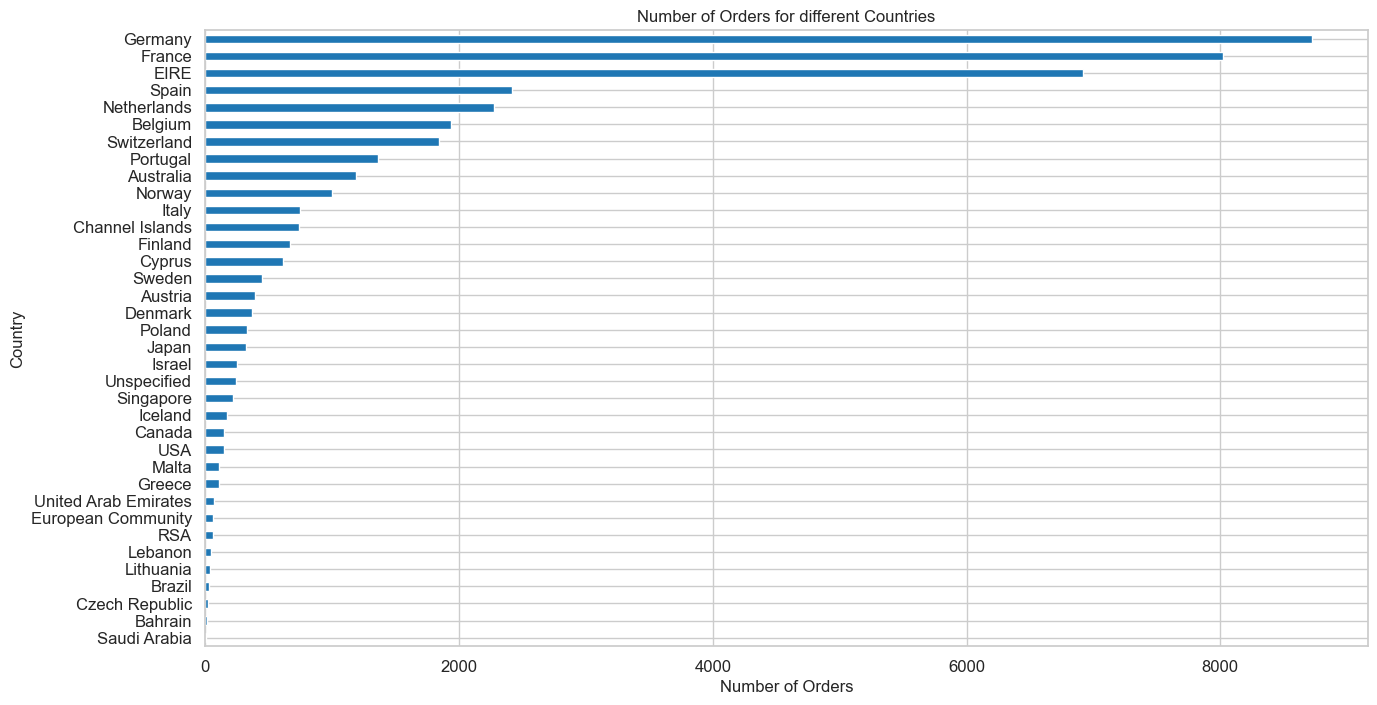

In [222]:
# Since the number of orders from UK is so high, is hard to see what is happening on the other countries
# So we are excluding UK now

group_country_orders = df2.groupby('Country')['InvoiceDate'].count().sort_values()
group_country_orders_without_uk = group_country_orders.copy()
del group_country_orders_without_uk['United Kingdom']

# plot number of unique customers in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_orders_without_uk.plot(kind='barh', fontsize=12, color='#1f77b4')
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

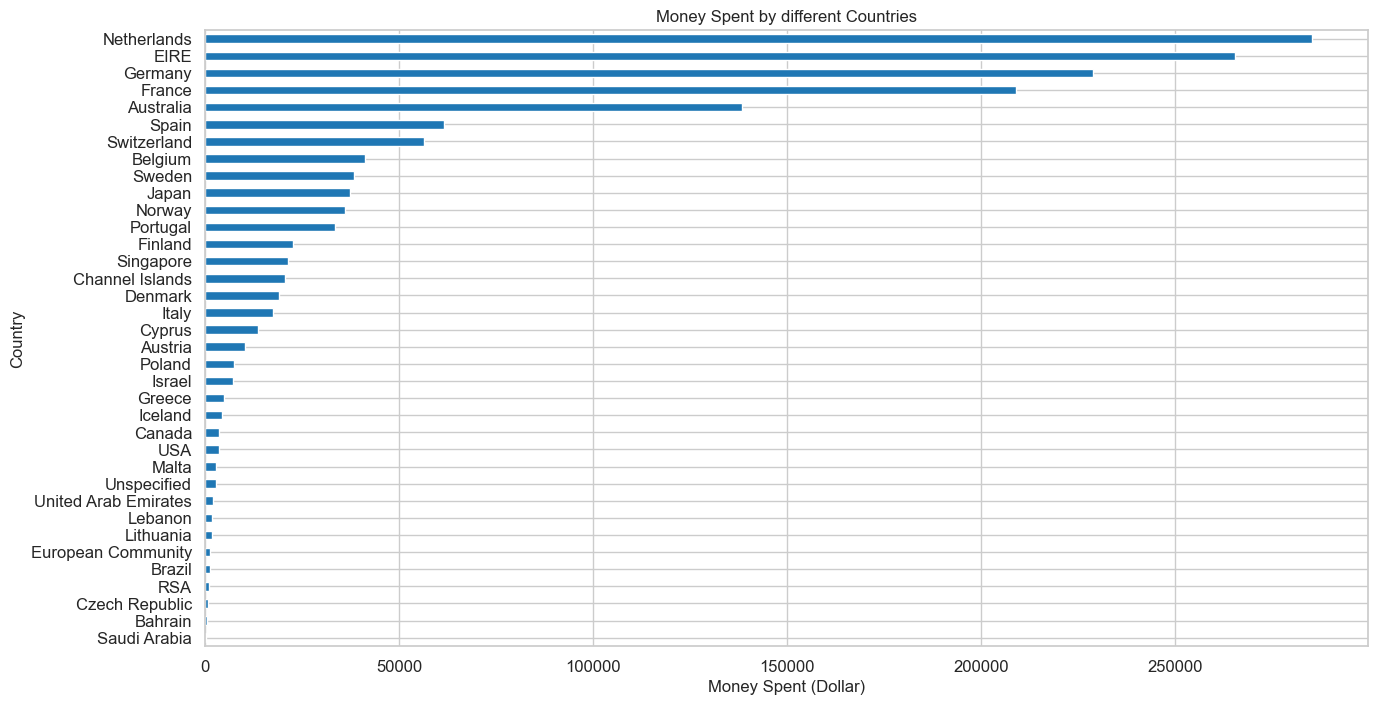

In [193]:
# Amount spent by each country (without UK)
group_country_amount_spent = df2.groupby('Country')['AmountSpent'].sum().sort_values()
del group_country_amount_spent['United Kingdom']

# plot total money spent by each country (without UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12, color='#1f77b4')
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

## Repeat Customers

In [194]:
# Get our date range for our data
print('Date Range: %s to %s' % (df2['InvoiceDate'].min(), df2['InvoiceDate'].max()))

# Since Our data ends at Nov-30 2011, we're taking all of the transactions that occurred before December 01, 2011 
df2 = df2.loc[df2['InvoiceDate'] < '2011-12-01']

Date Range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00


In [195]:
# Get total amount spent per invoice and associate it with CustomerID and Country
invoice_customer_df = df2.groupby(by=['InvoiceNo', 'InvoiceDate']).agg({'AmountSpent': sum, 'CustomerID': max,'Country': max,}).reset_index()
invoice_customer_df.head()

,InvoiceNo,InvoiceDate,AmountSpent,CustomerID,Country
0,536365,2010-12-01 08:26:00,139.12,17850,United Kingdom
1,536366,2010-12-01 08:28:00,22.20,17850,United Kingdom
2,536367,2010-12-01 08:34:00,278.73,13047,United Kingdom
3,536368,2010-12-01 08:34:00,70.05,13047,United Kingdom
4,536369,2010-12-01 08:35:00,17.85,13047,United Kingdom


In [196]:
# Sort on Amount spent, this gives us the largest invoices
invoice_customer_df.sort_values(by='AmountSpent', ascending=False).head(10)

,InvoiceNo,InvoiceDate,AmountSpent,CustomerID,Country
1911,541431,2011-01-18 10:01:00,77183.60,12346,United Kingdom
7949,556444,2011-06-10 15:28:00,38970.00,15098,United Kingdom
12446,567423,2011-09-20 11:05:00,31698.16,17450,United Kingdom
8135,556917,2011-06-15 13:37:00,22775.93,12415,Australia
14487,572209,2011-10-21 12:08:00,22206.00,18102,United Kingdom
12438,567381,2011-09-20 10:12:00,22104.80,17450,United Kingdom
10869,563614,2011-08-18 08:51:00,21880.44,12415,Australia
5481,550461,2011-04-18 13:20:00,21535.90,15749,United Kingdom
14399,572035,2011-10-20 12:03:00,20277.92,14646,Netherlands
10637,563076,2011-08-11 16:12:00,19150.66,14646,Netherlands


In [223]:
# We set our index to our invoice date
# And use Grouper(freq='M') groups data by the index 'InvoiceDate' by Month
# We then group this data by CustomerID and count the number of unique repeat customers for that month (data is the month end date)
# The filter fucntion allows us to subselect data by the rule in our lambda function i.e. those greater than 1 (repeat customers)
#freq='M' group by month
monthly_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
  pd.Grouper(freq='M'), 'CustomerID']).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID']

monthly_repeat_customers_df

InvoiceDate
2010-12-31    263
2011-01-31    153
2011-02-28    153
2011-03-31    203
2011-04-30    170
2011-05-31    281
2011-06-30    220
2011-07-31    227
2011-08-31    198
2011-09-30    272
2011-10-31    324
2011-11-30    541
Freq: ME, Name: CustomerID, dtype: int64

In [198]:
# Number of Unique customers per month
monthly_unique_customers_df = df2.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()
monthly_unique_customers_df

InvoiceDate
2010-12-31     885
2011-01-31     741
2011-02-28     758
2011-03-31     974
2011-04-30     856
2011-05-31    1056
2011-06-30     991
2011-07-31     949
2011-08-31     935
2011-09-30    1266
2011-10-31    1364
2011-11-30    1665
Freq: ME, Name: CustomerID, dtype: int64

In [199]:
# Ratio of Repeat to Unique customers
monthly_repeat_percentage = monthly_repeat_customers_df/monthly_unique_customers_df*100.0
monthly_repeat_percentage

InvoiceDate
2010-12-31    29.717514
2011-01-31    20.647773
2011-02-28    20.184697
2011-03-31    20.841889
2011-04-30    19.859813
2011-05-31    26.609848
2011-06-30    22.199798
2011-07-31    23.919916
2011-08-31    21.176471
2011-09-30    21.484992
2011-10-31    23.753666
2011-11-30    32.492492
Freq: ME, Name: CustomerID, dtype: float64

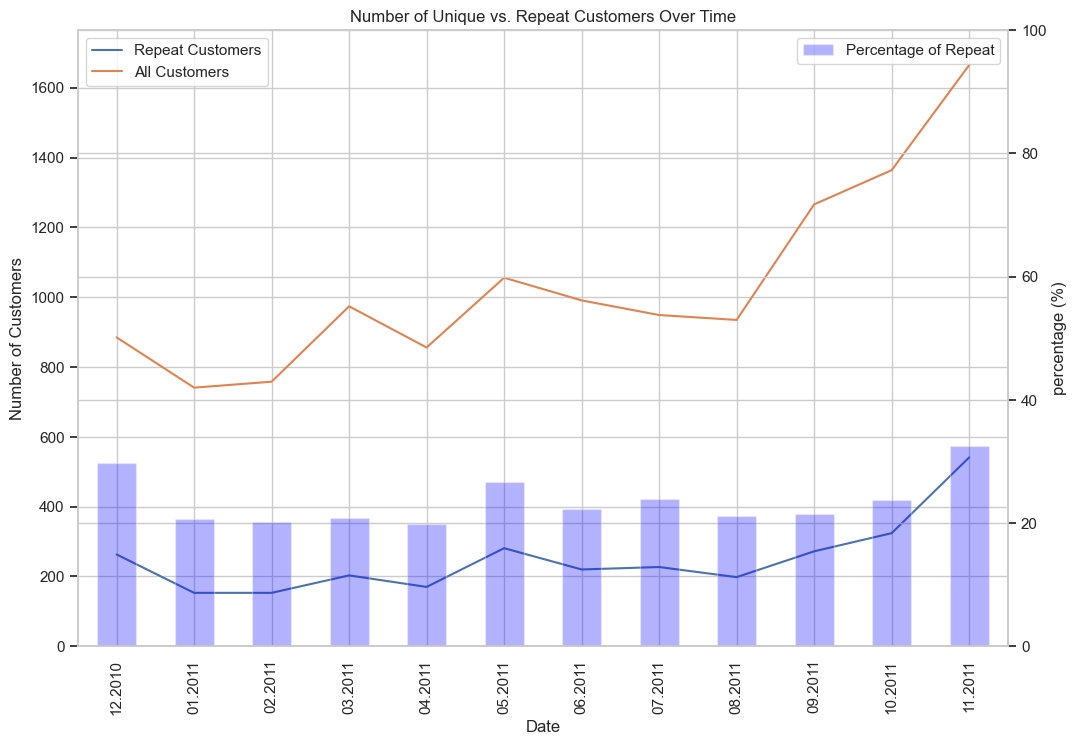

In [200]:
# Plotting this visually
# Note we're using a 2 scale y axis (left and right)

ax = pd.DataFrame(monthly_repeat_customers_df.values).plot(figsize=(12,8))

pd.DataFrame(monthly_unique_customers_df.values).plot(ax=ax,grid=True)

ax2 = pd.DataFrame(monthly_repeat_percentage.values).plot.bar(ax=ax,grid=True,secondary_y=True,color='blue',alpha=0.3)

ax.set_xlabel('Date')
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Unique vs. Repeat Customers Over Time')

ax2.set_ylabel('percentage (%)')

ax.legend(['Repeat Customers', 'All Customers'])
ax2.legend(['Percentage of Repeat'], loc='upper right')

ax.set_ylim([0, monthly_unique_customers_df.values.max()+100])
ax2.set_ylim([0, 100])

plt.xticks(range(len(monthly_repeat_customers_df.index)), [x.strftime('%m.%Y') for x in monthly_repeat_customers_df.index], rotation=45)

plt.show()

In [201]:
# Let's investigate the relationship between revenue and repeat customers
monthly_revenue_df = df2.set_index('InvoiceDate')['AmountSpent'].resample('M').sum()

monthly_rev_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID']).filter(lambda x: len(x) > 1).resample('M').sum()['AmountSpent']

# Let's get a percentage of the revenue from repeat customers to the overall monthly revenue
monthly_rev_perc_repeat_customers_df = monthly_rev_repeat_customers_df/monthly_revenue_df * 100.0
monthly_rev_perc_repeat_customers_df

InvoiceDate
2010-12-31    62.713792
2011-01-31    39.007101
2011-02-28    42.767478
2011-03-31    44.901787
2011-04-30    41.661132
2011-05-31    55.732401
2011-06-30    56.911595
2011-07-31    52.904475
2011-08-31    49.141899
2011-09-30    52.544416
2011-10-31    55.229144
2011-11-30    61.436148
Freq: ME, Name: AmountSpent, dtype: float64

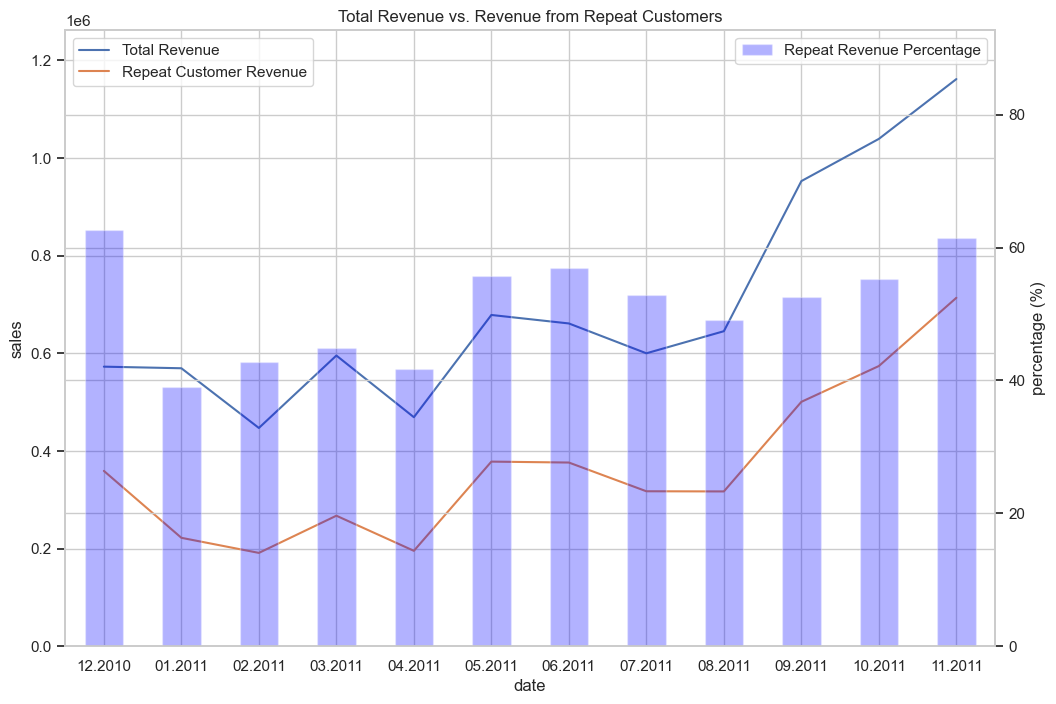

In [202]:
# Now let's plot this information we obtained above
ax = pd.DataFrame(monthly_revenue_df.values).plot(figsize=(12,8))

pd.DataFrame(monthly_rev_repeat_customers_df.values).plot(ax=ax,grid=True,)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue vs. Revenue from Repeat Customers')

ax.legend(['Total Revenue', 'Repeat Customer Revenue'])

ax.set_ylim([0, max(monthly_revenue_df.values)+100000])

ax2 = ax.twinx()

pd.DataFrame(monthly_rev_perc_repeat_customers_df.values).plot(ax=ax2,kind='bar',color='blue',alpha=0.3)

ax2.set_ylim([0, max(monthly_rev_perc_repeat_customers_df.values)+30])
ax2.set_ylabel('percentage (%)')
ax2.legend(['Repeat Revenue Percentage'])

ax2.set_xticklabels([x.strftime('%m.%Y') for x in monthly_rev_perc_repeat_customers_df.index])

plt.show()

# Item Trends

Let's count the number of items sold for each product for each period.

In [203]:
# Now let's get quantity of each item sold per month
date_item_df = df2.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'), 'StockCode'])['Quantity'].sum()

date_item_df.head(15)

InvoiceDate  StockCode
2010-12-31   10002        224
             10120         16
             10123C         1
             10124A         4
             10124G         5
             10125        143
             10133        123
             10135        366
             11001         65
             15034         38
             15036        132
             15039         17
             15044A         6
             15044B         2
             15044C         7
Name: Quantity, dtype: int64

In [204]:
# Rank items by the last month's sales
last_month_sorted_df = date_item_df.loc['2011-11-30']
last_month_sorted_df = last_month_sorted_df.reset_index()
last_month_sorted_df.sort_values(by='Quantity', ascending=False).head(10)

,StockCode,Quantity
2371,84826,12551
1567,23084,12393
827,22197,8458
738,22086,5919
2488,85099B,5678
2385,84879,5190
1135,22578,4981
2498,85123A,4861
1134,22577,4582
2278,84077,4500


In [214]:
# Let's look at the top 5 items sale per month 

date_item_df = df.loc[df['StockCode'].isin(['23084', '84826', '22197', '22086', '85099B'])].set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'StockCode'])['Quantity'].sum()

date_item_df

InvoiceDate  StockCode
2010-12-31   22086         2453
             22197         2731
             84826          306
             85099B        2126
2011-01-31   22086           24
             22197         1809
             84826          480
             85099B        2639
2011-02-28   22086            5
             22197         2663
             84826           66
             85099B        3078
2011-03-31   22086           87
             22197         2798
             84826           60
             85099B        5281
2011-04-30   22086          -27
             22197         1856
             84826            1
             85099B        2452
2011-05-31   22086           17
             22197         6848
             23084         1131
             85099B        3617
2011-06-30   22086          344
             22197         2092
             23084         1693
             84826            4
             85099B        3676
2011-07-31   22086          377
             2219

In [220]:
# Now let's generate a monthly trend of each of the top 5 items
trending_itmes_df = (
    pd.pivot(
        data=date_item_df.reset_index(),
        index='InvoiceDate',
        columns='StockCode'
    )
    .fillna(0)
)
trending_itmes_df

Quantity                                   
StockCode      22086    22197    23084    84826  85099B
InvoiceDate                                            
2010-12-31    2453.0   2731.0      0.0    306.0  2126.0
2011-01-31      24.0   1809.0      0.0    480.0  2639.0
2011-02-28       5.0   2663.0      0.0     66.0  3078.0
2011-03-31      87.0   2798.0      0.0     60.0  5281.0
2011-04-30     -27.0   1856.0      0.0      1.0  2452.0
2011-05-31      17.0   6848.0   1131.0      0.0  3617.0
2011-06-30     344.0   2092.0   1693.0      4.0  3676.0
2011-07-31     377.0   1862.0    318.0      2.0  3126.0
2011-08-31     370.0   5416.0   1783.0     72.0  5401.0
2011-09-30    2106.0   4153.0    196.0      0.0  4267.0
2011-10-31    3189.0   5865.0   6344.0     11.0  4803.0
2011-11-30    7868.0  12159.0  14883.0  12551.0  5807.0
2011-12-31    2089.0   6198.0   4298.0     92.0  1090.0

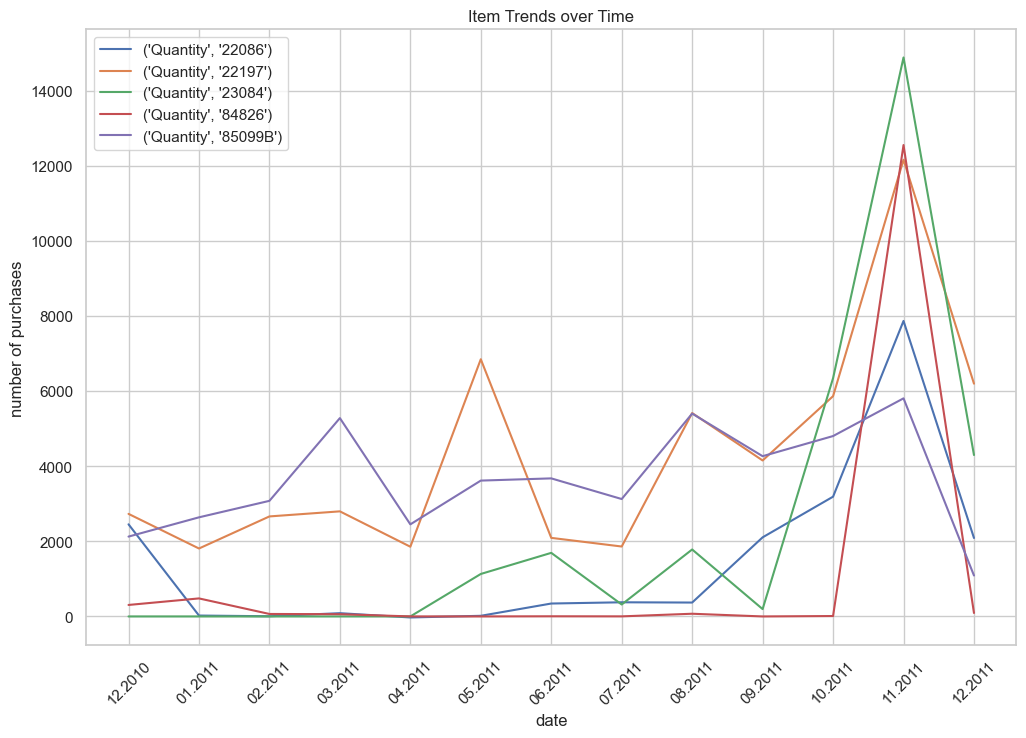

In [221]:
# Plot the above information
ax = pd.DataFrame(trending_itmes_df.values).plot(figsize=(12,8), grid=True,)

ax.set_ylabel('number of purchases')
ax.set_xlabel('date')
ax.set_title('Item Trends over Time')

ax.legend(trending_itmes_df.columns, loc='upper left')

plt.xticks(range(len(trending_itmes_df.index)), [x.strftime('%m.%Y') for x in trending_itmes_df.index], rotation=45)

plt.show()